In [6]:
#Support Victor Machince
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

df = pd.read_csv('F:\\CS 325 Data Mining\\Datasets\\archive\\Heart.csv')
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,typical,145,233,1,2,150,0,2.3,3,0.0,fixed,No
1,67,1,asymptomatic,160,286,0,2,108,1,1.5,2,3.0,normal,Yes
2,67,1,asymptomatic,120,229,0,2,129,1,2.6,2,2.0,reversable,Yes
3,37,1,nonanginal,130,250,0,0,187,0,3.5,3,0.0,normal,No
4,41,0,nontypical,130,204,0,2,172,0,1.4,1,0.0,normal,No


In [7]:
X= df.iloc[:,1:14]
Y= df.iloc[:,-1]
df['ChestPain'].replace(['typical', 'nontypical', 'nonanginal', 'asymptomatic'], [1,2,3,4], inplace=True)
df['Thal'].replace(['normal', 'fixed', 'reversable'], [1,2,3], inplace=True)
df['AHD'].replace(['No', 'Yes'], [0,1], inplace=True)
df.replace('NA', np.nan, inplace = True)
df.replace(' ', np.nan, inplace = True)
df.dropna( inplace = True, how = 'any')
df = df[df.Thal != '.']
df.head()

,Age,Sex,ChestPain,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca,Thal,AHD
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,2.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,1.0,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,3.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,1.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,1.0,0


In [8]:
# Split the data into features and labels
X = df.drop('AHD', axis=1)
y = df['AHD']

# Encode the labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the SVM model
svm = SVC()

# Train the model
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy}')

Test accuracy: 0.65


In [9]:
from seaborn import load_dataset, pairplot
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [10]:
print(df.head())

   Age  Sex  ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  \
0   63    1          1     145   233    1        2    150      0      2.3   
1   67    1          4     160   286    0        2    108      1      1.5   
2   67    1          4     120   229    0        2    129      1      2.6   
3   37    1          3     130   250    0        0    187      0      3.5   
4   41    0          2     130   204    0        2    172      0      1.4   

   Slope   Ca  Thal  AHD  
0      3  0.0   2.0    0  
1      2  3.0   1.0    1  
2      2  2.0   3.0    1  
3      3  0.0   1.0    0  
4      1  0.0   1.0    0  


In [11]:
df = df.dropna()
print(len(df))

297


In [15]:
X = df[['Age', 'Sex', 'ChestPain', 'RestBP', 'Chol', 'Fbs', 'RestECG', 'MaxHR', 'Ca']]
y = df['MaxHR']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

In [16]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

SVC(kernel='linear')

In [17]:
predictions = clf.predict(X_test)
print(predictions[:5])

[103 163 143 115 114]


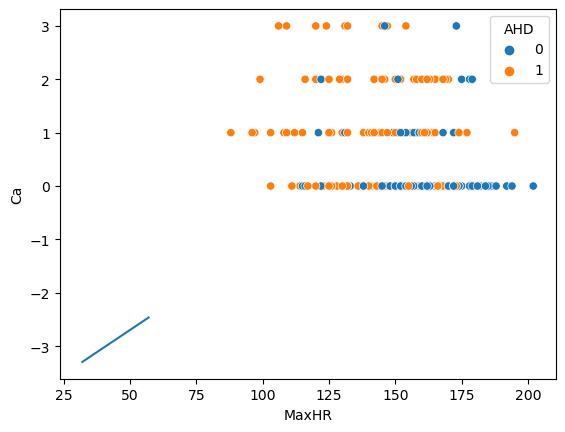

In [18]:
df = df.dropna()
df = df[df['AHD'] != '1']    # This limits us to two classes

# X = df.select_dtypes('number')
X = df[['MaxHR', 'Ca']]
y = df['AHD']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=100)

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

# Visualizing the linear function for our SVM classifier
import numpy as np
from seaborn import scatterplot
w = clf.coef_[0]
b = clf.intercept_[0]
x_visual = np.linspace(32,57)
y_visual = -(w[0] / w[1]) * x_visual - b / w[1]

scatterplot(data = X_train, x='MaxHR', y='Ca', hue=y_train)
plt.plot(x_visual, y_visual)
plt.show()

In [19]:
clf = SVC(kernel='linear')
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.7733333333333333
